### Slope ($m$)

**Definition**

* **Rate of Change**: How much $y$ changes for a unit change in $x$.
* **Visual**: Determines the **steepness** and **direction** of the line.

**Mathematical Formula**

$$m = \frac{\text{Rise}}{\text{Run}} = \frac{\Delta y}{\Delta x}$$

* $\Delta y$: Change in vertical value ($y_2 - y_1$).
* $\Delta x$: Change in horizontal value ($x_2 - x_1$).

**Example Scenario: Bike Journey**

* **Context**: Measuring distance traveled over time.
* **Data**:
    * **$x$ (Time)**: $[0, 1, 2, 3, 4, 5, 6, 7]$ (hrs)
    * **$y$ (Distance)**: $[0, 35, 70, 85, 120, 150, 190, 250]$ (km)
* **Interpretation**:
    * **Slope**: Speed (km/hr).
    * **Calculation**: Between hours 1 and 2: $\frac{70-35}{2-1} = 35$ km/hr.

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
time = [0, 1, 2, 3, 4, 5, 6, 7]
distance = [0, 35, 70, 85, 120, 150, 190, 250]

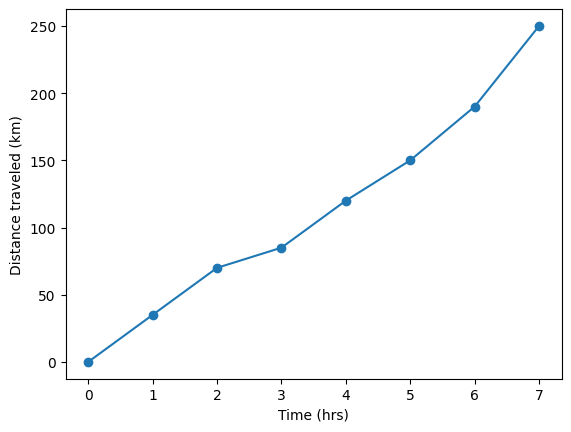

In [70]:
_ = plt.plot(time, distance)
_ = plt.scatter(time, distance)
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')

### Slope and intercept of each line segment

And using that slope and intercept value to predict the distance for hour 8.

In [71]:
points = list(zip(time, distance))
points

[(0, 0), (1, 35), (2, 70), (3, 85), (4, 120), (5, 150), (6, 190), (7, 250)]

For line segment between (0, 0), (1, 35)
  Slope = 35/1 = 35.0
  Intercept = 0.0
  Predicted distance for hour 8: 280.0

For line segment between (1, 35), (2, 70)
  Slope = 35/1 = 35.0
  Intercept = 0.0
  Predicted distance for hour 8: 280.0

For line segment between (2, 70), (3, 85)
  Slope = 15/1 = 15.0
  Intercept = 40.0
  Predicted distance for hour 8: 160.0

For line segment between (3, 85), (4, 120)
  Slope = 35/1 = 35.0
  Intercept = -20.0
  Predicted distance for hour 8: 260.0

For line segment between (4, 120), (5, 150)
  Slope = 30/1 = 30.0
  Intercept = 0.0
  Predicted distance for hour 8: 240.0

For line segment between (5, 150), (6, 190)
  Slope = 40/1 = 40.0
  Intercept = -50.0
  Predicted distance for hour 8: 270.0

For line segment between (6, 190), (7, 250)
  Slope = 60/1 = 60.0
  Intercept = -170.0
  Predicted distance for hour 8: 310.0



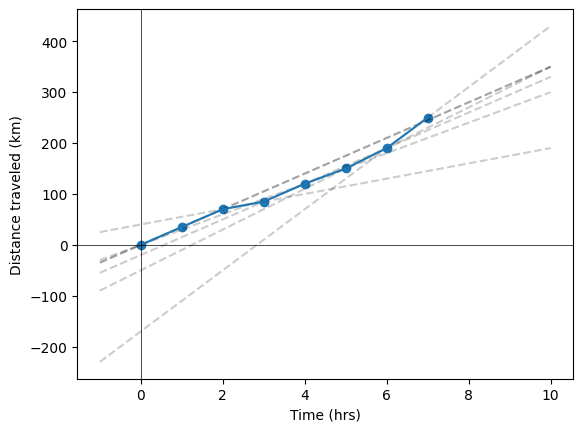

In [72]:
for i in range(len(points)):
  if i == len(points)-1:
    break

  p1 = points[i]  # (x1, y1)
  p2 = points[i+1]  # (x2, y2)
  print(f'For line segment between {p1}, {p2}')

  run = p2[0] - p1[0]  # x2 - x1
  rise = p2[1] - p1[1]  # y2 - y1
  slope = rise / run
  print(f'  Slope = {rise}/{run} = {slope}')

  # b = y - mx
  intercept = p1[1] - (slope * p1[0])  # Can use either p1 or p2
  print(f'  Intercept = {intercept}')

  # With this regression line predict distance for hour 8
  print(f'  Predicted distance for hour 8: {slope * 8 + intercept}\n')

  # Plot the line
  x = np.linspace(-1, 10, 100)
  y = slope * x + intercept
  _ = plt.plot(x, y, color='black', linestyle='--', alpha=0.2)

# Plot data
_ = plt.plot(time, distance)
_ = plt.scatter(time, distance)
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')

# Axis lines
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)

### Using slope and intercept of each segment and making predictions for entire distance data

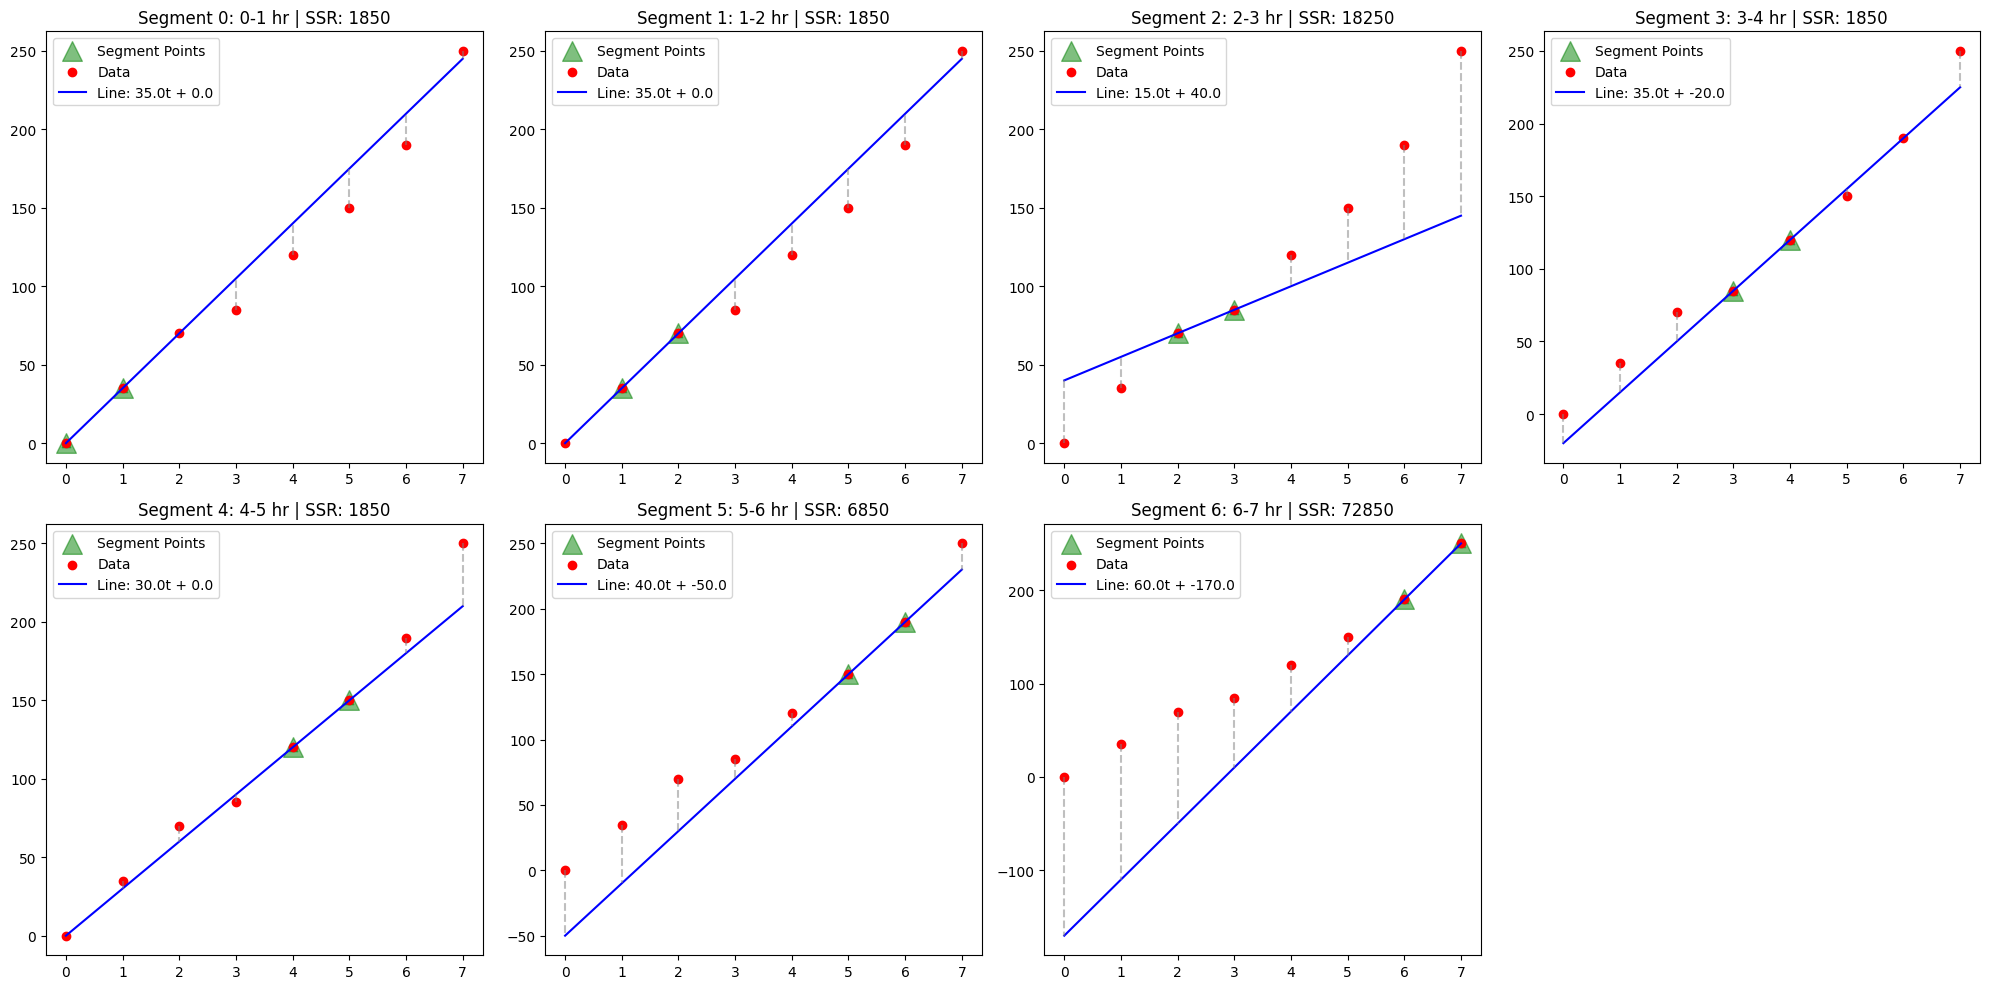

In [73]:
# Data
t = np.array([0, 1, 2, 3, 4, 5, 6, 7])
d = np.array([0, 35, 70, 85, 120, 150, 190, 250])

# Setup Grid (7 segments -> 2 rows, 4 cols)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Iterate over segments
for i in range(len(t) - 1):
  # 1. Calc m, b for current segment
  t1, d1 = t[i], d[i]
  t2, d2 = t[i+1], d[i+1]

  m = (d2 - d1) / (t2 - t1)
  b = d1 - m * t1

  # 2. Predict for ALL points
  d_pred = m * t + b

  # 3. Calc SSR
  ssr = np.sum((d - d_pred)**2)

  # 4. Plot
  ax = axes[i]
  _ = ax.scatter([t1, t2], [d1, d2], s=200, marker='^',
                 color='green', alpha=0.5, label='Segment Points')
  _ = ax.scatter([t1, t2], [d1, d2], marker='^', alpha=0.5, color='green')
  _ = ax.scatter(t, d, color='red', label='Data')
  _ = ax.plot(t, d_pred, color='blue', label=f'Line: {m:.1f}t + {b:.1f}')
  _ = ax.vlines(t, d, d_pred, color='gray', linestyle='--', alpha=0.5)

  _ = ax.set_title(f'Segment {i}: {t1}-{t2} hr | SSR: {ssr:.0f}')
  _ = ax.legend()

# Cleanup empty subplots
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()